# 8.2 Statistics Part III: Describing Data

For this section we'll be using a single data set to demonstrate how to do each of the required calculations.

## Why can't we just use Excel or Google Sheets?

These programs are great for simply analysis but cannot handle very large data sets that well - not to mention that some of the calculations and data formatting we can performm with Pandas are either very complicated to implement in either program or cannot be easily accomplished with their existing functions.

Data is often messy. The first stage consists of *data cleaning* and the libraries we'll be using make this much easier than either of these programs.


## Import Libraries and Data Set

We'll read this data set into our notebook from a .csv file. CSV stands for Comma Separated Values. Think of this as a file that stores a spreadsheet created in excel or google sheets in it's most simplified form. CSV files can be read by both excel and google sheets.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

nhl_url = 'https://raw.githubusercontent.com/RC25-QR105/lecture_notes/refs/heads/main/nhl_2019.csv'

nhl = pd.read_csv(nhl_url) # replace with whatever dataset here

This is a larger set of data. We'll use the `head` function in pandas to print only the first 5 rows of the dataframe. This allows us to see column headings and the general format of the dataframe.

In [2]:
nhl.head() # displays first 5 lines

,team,wins,losses,ot_losses,PTS,GF,GA,goal_diff,Country
0,Tampa Bay Lightning,62,16,4,128,325,222,103,USA
1,Calgary Flames,50,25,7,107,289,227,62,CA
2,Boston Bruins,49,24,9,107,259,215,44,USA
3,Washington Capitals,48,26,8,104,278,249,29,USA
4,New York Islanders,48,27,7,103,228,196,32,USA


In [3]:
nhl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   team       31 non-null     object
 1   wins       31 non-null     int64 
 2   losses     31 non-null     int64 
 3   ot_losses  31 non-null     int64 
 4   PTS        31 non-null     int64 
 5   GF         31 non-null     int64 
 6   GA         31 non-null     int64 
 7   goal_diff  31 non-null     int64 
 8   Country    31 non-null     object
dtypes: int64(7), object(2)
memory usage: 2.3+ KB


In [4]:
nhl.tail()

,team,wins,losses,ot_losses,PTS,GF,GA,goal_diff,Country
26,Buffalo Sabres,33,39,10,76,226,271,-45,USA
27,Detroit Red Wings,32,40,10,74,227,277,-50,USA
28,New Jersey Devils,31,41,10,72,222,275,-53,USA
29,Los Angeles Kings,31,42,9,71,202,263,-61,USA
30,Ottawa Senators,29,47,6,64,242,302,-60,CA


## Measures of Central Tendency
One important aspect of a distribution is where its center is located. The Mean, Median and Mode are all measures of central tendency.

### Mean
The first measure is arithmetic mean, or just mean for short. This can also be referred to as the average.

> **Mean**  
> The mean of a set of data is the sum of the data values divided by the number of values.

$$\mu = \bar{x} = \frac{\sum x_i}{n}$$

#### Calculating the Mean

We calculate the mean of a series or column of a pandas dataframe using `mean()`.

In [6]:
## find mean
print(nhl['PTS'].mean())

90.74193548387096


#### Try it Yourself

Find the mean of the `losses` column.


In [7]:
## find average number of losses
print(nhl['losses'].mean())

32.25806451612903


### Median

When working with data that have outliers – values far outside the primary grouping – it is common to use a different measure of center, the median.

> **Median**  
> The median of a set of data is the value in the middle when the data is in order

**To find the median:**

* List data in order from smallest to largest, or largest to smallest.

* If the number of data values, $N$, is odd, then the median is the middle data value.  This value can be found by rounding $N/2$ up to the next whole number.  

* If the number of data values is even, there is no one middle value, so we find the mean of the two middle values (values $N/2$ and $N/2 + 1$)


#### Calculating the Median

We calculate the mean of a series or column of a pandas dataframe using `median()`.

In [8]:
nhl['PTS'].median()


93.0

#### Try it Yourself

Find the median of the `losses` column.

In [9]:
## find median number of losses
nhl['losses'].median()

32.0

### Mode

In addition to the mean and the median, there is one other common measurement of the "typical" value of a data set: the mode.  

> **Mode**  
> The mode is the element of the data set that occurs most frequently.
>

The mode is commonly used for categorical data. It doesn't make sense as a measure with most quantitative data, because the values tend to vary too much.

#### Calculating the Mode

We calculate the mode of a series or column of a pandas dataframe using `mode()`.

In [10]:
nhl['Country'].mode()


,Country
0,USA


Remember that if we wanted to get the actual counts, we could use `value_counts()`

#### Try it Yourself

Find the mode of the `ot_losses` column.

In [11]:
## find the mode
nhl['ot_losses'].mode()


,ot_losses
0,9


## Measures of Variation

We also need a way to measure how spread out or varied a data set is.


### Range

There are several ways to measure this "spread" of the data.  The first is the simplest and is called the range.

> **Range**  
> The range is the difference between the maximum value and the minimum value of the data set.


#### Calculating the Range

There is no built in pandas function to find the range. To calculate it we use `max()` and `min()`.

In [12]:
# Range is calculated by range = max - min
nhl['PTS'].max() - nhl['PTS'].min()


64

#### Try it Yourself

Find the range of the `losses` column.

In [13]:
# find the range
nhl['losses'].max() - nhl['losses'].min()

31

### Writing a Function with Pandas

If the range is a common calculation you end up doing, we can write a function that can calculate the range for a column of a dataframe. There a variety of ways to do this.

In [14]:
def range(df, col_name):

    r = df[col_name].max() - nhl[col_name].min()
    #df means data fram

    return r
range(nhl, 'PTS')

64

### Standard Deviation

A more sophisticated way of determining variation in a data set is using standard deviation.

> **Standard Deviation**
> The standard deviation is a measure of variation based on measuring how far each data value deviates, or is different, from the mean.

A few important characteristics:
* Standard deviation is always positive.
* Standard deviation will be zero if all the data values are equal, and will get larger as the data spreads out.
* Standard deviation has the same units as the original data.
* Standard deviation, like the mean, can be highly influenced by outliers.

To compute standard deviation

1. Find the deviation of each data from the mean.  In other words, subtract the mean from the data value.
2. Square each deviation.
3. Add the squared deviations.
4. Divide by $n$, the number of data values, if the data represents a whole population; divide by $n-1$ if the data is from a sample.
5. Computer the square root of the result.

$$ \sigma = \sqrt{\frac{\sum (x - \mu)^2}{n-1}} $$

This is a very tedious calculation to do by hand. Luckily, pandas does this easily for us.

#### Calculate the Standard Deviation

We calculate the standard deviation with pandas using `std()`

In [15]:
nhl['PTS'].std()


13.652759774579119

#### Try it Yourself

Calculate the standard deviation of the `losses` column.

In [16]:
# find the standard deviation
nhl['losses'].std()


6.371644172610834

### Quartiles

Where standard deviation is a measure of variation based on the mean, quartiles are based on the median.

> **Quartiles**  
> Quartiles are values that divide the data in quarters.
>

* The first quartile $(Q1)$ is the value so that $25\%$  of the data values are below it
* The second quartile is the same as the median, since the median is the value so that $50\%$  of the data values are below it.
* The third quartile $(Q3)$ is the value so that $75\%$  of the data values are below it.

This divides the data into quarters;  $25\%$ of the data is between the minimum and $Q1$, $25\%$ is between $Q1$ and the median, $25\%$ is between the median and $Q3$, and $25\%$is between $Q3$ and the maximum value.


#### Calculate the Quartiles

We calculate the standard deviation with pandas using `quantile([0.25, 0.5, 0.75])`.

In [18]:
nhl['PTS'].quantile([0.25, 0.5, 0.75])

,PTS
0.25,80.5
0.50,93.0
0.75,100.0


#### Try it Yourself

Calculate the quartiles for the `GA` column. In a markdown cell below the output, write a sentence on how to read this data.

In [19]:
# find the quartiles
nhl['GA'].quantile([0.25, 0.5, 0.75])


,GA
0.25,225.0
0.50,246.0
0.75,271.5


## Five Number Summary

Quartiles are used with the median, minimum, and maximum values to form a 5 number summary of the data.


#### Calculate the Five Number Summary

The pandas function `describe()` outputs a table of key information about a column. The following information is output.
- **count**, which is equivalent to the number of cells (rows)
- **mean**, the average of the values in the column
- **std**, which is the standard deviation
- **min**, the minimum value
- **25%**, the 25th percentile of the values
- **50%**, the 50th percentile of the values, which is the equivalent to the median
- **75%**, the 75th percentile of the values
- **max**, the maximum value

We can see the output after running the code below.

In [20]:
nhl['PTS'].describe()

,PTS
count,31.000000
mean,90.741935
std,13.652760
min,64.000000
25%,80.500000
50%,93.000000
75%,100.000000
max,128.000000


We calculate the five number summary with pandas using a subset of the output of `describe()`.


In [21]:
nhl['PTS'].describe().loc[['min', '25%', '50%', '75%', 'max']]

,PTS
min,64.0
25%,80.5
50%,93.0
75%,100.0
max,128.0


#### Try it Yourself

Use the `describe()` function to output the key data measures for the `losses` column.

In [22]:
# output the data summary

nhl['losses'].describe()

,losses
count,31.000000
mean,32.258065
std,6.371644
min,16.000000
25%,28.000000
50%,32.000000
75%,36.500000
max,47.000000


Fill out the values listed below based on this output.

|         | Value |
|:--------|--------:|
|  Minimum   |     |
|  Q1  |    |
|  Median  |    |
|  Q3   |   |
|  Maximum   |     |


### Boxplots


For visualizing data, there is a graphical representation of a 5-number summary called a box plot, or box and whisker graph.

#### Create a Boxplot

We create a boxplot using either matplotlib or with the direct pandas function `boxplot()` function. Note that this is a dataframe function, so we need to specify which column or columns we want within the function call.

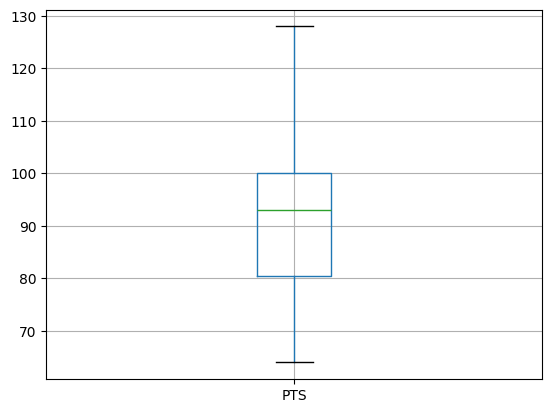

In [23]:
nhl.boxplot(column=['PTS'])
plt.show()

We can also create multiple boxplots in the same plot. This can make it easier to compare the spread of different columns of data. However, it makes more sense to compare boxplots that have similar ranges of values.

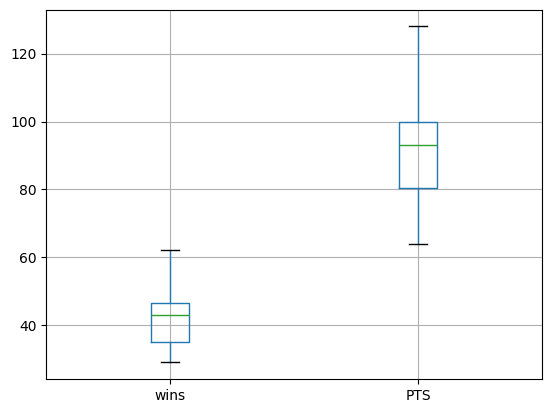

In [24]:
nhl.boxplot(column=['wins','PTS'])
plt.show()

As we can see, comparing wins and PTS is not super helpful, even though we could assume that the team that wins more games will earn more points over the course of the season. Instead, let's try comparing goals scored for (GF) and goals against (GA).

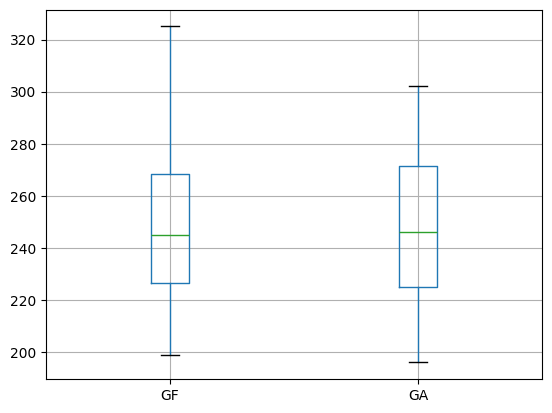

In [25]:
nhl.boxplot(column=['GF','GA'])
plt.show()

These are on the same scale or relative range of values and so comparing these two columns makes much more sense visually.

#### Try it Yourself

Create a boxplot for the `wins` and `losses` columns.

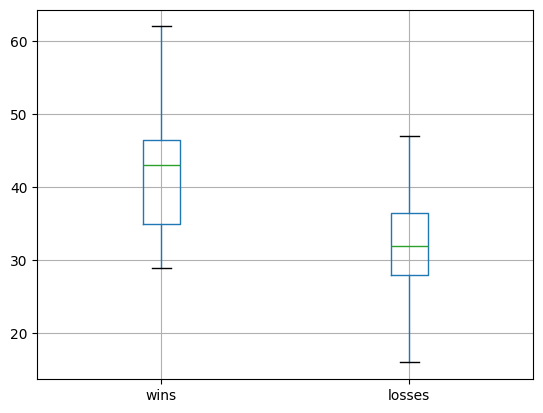

In [26]:
# create boxplot
nhl.boxplot(column=['wins','losses'])
plt.show()

